In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## **`Reading the csv file`**

In [53]:
Data_frame = pd.read_csv("/gdrive/MyDrive/Pattern/Bladder_cancer/bladder_cancer.csv")

## **`Viewing DataFrame`**

In [54]:
Data_frame.head()

,A/G Ratio,Albumin,Alk,ALT (GPT),AST (GOT),BUN,Calcium,Chloride,Creatinine,Direct Bilirubin,...,age,gender,Hyper1en1ion,Diabe1es,Smoking,Drinking,Bee1leNu1,FamilyHis1ory,Disease,Patient Number
0,NaN,3.9,53.0,28.0,25.0,11.0,NaN,107.0,0.60,0.1,...,72.0,0.0,0,0,0,0,0,0,Cystitis,222159
1,NaN,3.2,87.0,14.0,26.0,9.8,NaN,101.8,0.60,0.1,...,74.0,0.0,0,0,0,0,0,0,Cystitis,397523
2,NaN,4.4,69.0,28.0,16.0,21.0,8.5,100.0,1.40,0.2,...,69.0,1.0,1,1,0,0,0,0,Cystitis,556667
3,NaN,NaN,NaN,18.0,24.0,11.0,NaN,103.9,0.96,NaN,...,69.0,1.0,0,0,0,1,0,0,Cystitis,567311
4,NaN,4.1,175.0,34.0,66.0,184.0,7.4,110.0,3.10,0.2,...,69.0,1.0,1,1,0,0,0,0,Cystitis,1194899


## **`Checking the columns`**

In [55]:
Data_frame.columns

Index(['A/G Ratio', 'Albumin', 'Alk', 'ALT (GPT)', 'AST (GOT)', 'BUN',
       'Calcium', 'Chloride', 'Creatinine', 'Direct Bilirubin',
       'Estimated GFR', 'Glucose AC', 'Nitrite', 'Urine occult Blood', 'pH',
       'Potassium', 'Sodium', 'Specific Gravity', 'Strip WBC',
       'Total Bilirubin', 'Total Cholesterol', 'Total Protein', 'Triglyceride',
       'Urine epitheilum (UL)', 'Urine epithelium count', 'Uric acid',
       'Urine Bilirubin', 'Urine Glucose', 'Urine Ketone', 'Urine Protein',
       'Urobilinogen', 'age', 'gender', 'Hyper1en1ion', 'Diabe1es', 'Smoking',
       'Drinking', 'Bee1leNu1', 'FamilyHis1ory', 'Disease', 'Patient Number'],
      dtype='object')

## **`Cheking the datatypes of the columns`**

In [56]:
Data_frame.dtypes

A/G Ratio                 float64
Albumin                   float64
Alk                       float64
ALT (GPT)                 float64
AST (GOT)                 float64
BUN                       float64
Calcium                   float64
Chloride                  float64
Creatinine                float64
Direct Bilirubin          float64
Estimated GFR             float64
Glucose AC                float64
Nitrite                   float64
Urine occult Blood        float64
pH                        float64
Potassium                 float64
Sodium                    float64
Specific Gravity          float64
Strip WBC                 float64
Total Bilirubin           float64
Total Cholesterol         float64
Total Protein             float64
Triglyceride              float64
Urine epitheilum (UL)     float64
Urine epithelium count    float64
Uric acid                 float64
Urine Bilirubin           float64
Urine Glucose             float64
Urine Ketone              float64
Urine Protein 

## **`Cheking if NaN value exists`**

In [57]:
len(Data_frame)

1336

In [58]:
Data_frame.isna().sum()

A/G Ratio                 590
Albumin                   300
Alk                       506
ALT (GPT)                  91
AST (GOT)                  62
BUN                        25
Calcium                   572
Chloride                  113
Creatinine                  7
Direct Bilirubin          405
Estimated GFR              12
Glucose AC                 52
Nitrite                    36
Urine occult Blood         36
pH                         36
Potassium                  48
Sodium                     50
Specific Gravity           36
Strip WBC                 215
Total Bilirubin           289
Total Cholesterol         260
Total Protein             382
Triglyceride              273
Urine epitheilum (UL)     575
Urine epithelium count     36
Uric acid                 212
Urine Bilirubin            36
Urine Glucose             221
Urine Ketone              222
Urine Protein              36
Urobilinogen               36
age                         3
gender                      3
Hyper1en1i

In [59]:
def fill_values(column, column_type):
  if column_type == "Categorical":
    mid = Data_frame[column].median()
    Data_frame[column].fillna(mid, inplace = True)
  if column_type == "Continuous":
    mean = Data_frame[column].mean()
    Data_frame[column].fillna(mean, inplace = True)

In [60]:
column_and_types = [
    ["A/G Ratio", "Continuous"],
    ["Albumin", "Continuous"],
    ["Alk", "Continuous"],
    ["ALT (GPT)", "Continuous"],
    ["AST (GOT)", "Continuous"],
    ["BUN", "Continuous"],
    ["Calcium", "Continuous"],
    ["Chloride", "Continuous"],
    ["Creatinine", "Continuous"],
    ["Direct Bilirubin", "Continuous"],
    ["Estimated GFR", "Continuous"],
    ["Glucose AC", "Continuous"],
    ["pH", "Continuous"],
    ["Potassium", "Continuous"],
    ["Sodium", "Continuous"],
    ["Specific Gravity", "Continuous"],
    ["Strip WBC", "Continuous"],
    ["Total Bilirubin", "Continuous"],
    ["Total Cholesterol", "Continuous"],
    ["Total Protein", "Continuous"],
    ["Triglyceride", "Continuous"],
    ["Urine epitheilum (UL)", "Continuous"],
    ["Urine epithelium count", "Continuous"],
    ["Uric acid", "Continuous"],
    ["Urine Bilirubin", "Categorical"],
    ["Urine Glucose", "Categorical"],
    ["Urine Ketone", "Categorical"],
    ["Urine Protein", "Categorical"],
    ["Urobilinogen", "Categorical"],
    ["Nitrite", "Categorical"],
    ["Urine occult Blood", "Categorical"],
    ["age", "Categorical"],
    ["gender", "Categorical"]
]

In [61]:
for i in range(len(column_and_types)):
  fill_values(column_and_types[i][0], column_and_types[i][1])

In [62]:
Data_frame.isna().sum()

A/G Ratio                 0
Albumin                   0
Alk                       0
ALT (GPT)                 0
AST (GOT)                 0
BUN                       0
Calcium                   0
Chloride                  0
Creatinine                0
Direct Bilirubin          0
Estimated GFR             0
Glucose AC                0
Nitrite                   0
Urine occult Blood        0
pH                        0
Potassium                 0
Sodium                    0
Specific Gravity          0
Strip WBC                 0
Total Bilirubin           0
Total Cholesterol         0
Total Protein             0
Triglyceride              0
Urine epitheilum (UL)     0
Urine epithelium count    0
Uric acid                 0
Urine Bilirubin           0
Urine Glucose             0
Urine Ketone              0
Urine Protein             0
Urobilinogen              0
age                       0
gender                    0
Hyper1en1ion              0
Diabe1es                  0
Smoking             

## **`Dropping Patient Number column`**

In [63]:
Final_Data_frame = Data_frame.drop("Patient Number", axis=1)

## **`Integer encoding of the labels`**

In [64]:
def integer_encoding(Data_frame, column):
  from sklearn import preprocessing
  label = preprocessing.LabelEncoder()
  label.fit(Data_frame[column])
  Labels = label.transform(Data_frame[column])
  Classes = label.classes_
  return Labels, Classes 

## **`Label encoding according to need`**

In [65]:
def label_encoding(Data_frame, column, class1, class2):
  labels = []
  for i in range(len(Data_frame)):
    if Data_frame.iloc[i][column] == class1:
      labels.append(0)
    else:
      labels.append(1)
  classes = np.unique(Data_frame["Disease"])
  # classes = np.flip(classes)
  return np.array(labels), classes


## **`Shuffling the dataset`**

In [66]:
def shuffle(Final_Data_frame): 
  np.random.seed(10)
  Final_Data_frame = Final_Data_frame.sample(frac=1)
  Final_Data_frame = Final_Data_frame.reset_index(drop=True)
  return Final_Data_frame

## **`Splitting train and test data`**

In [67]:
def splitting(X, Y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state=53, stratify=Y)
  # print(f"Training samples: {len(X_train)}")
  # print(f"Testing samples: {len(X_test)}")
  return X_train, X_test, Y_train, Y_test

## **`Accuracy score`**

In [68]:
def Accuracy(Y_test, Y_pred, suffix=None):
  from sklearn.metrics import accuracy_score
  Accuracy = accuracy_score(Y_test, Y_pred)
  Accuracy = round(Accuracy, 3)*100
  print(f"{suffix}'s accuracy: {Accuracy}%")  
  return Accuracy

## **`Classification report`**

In [69]:
def classification_report(Y_test, Y_pred, Classes, suffix=None):
  from sklearn.metrics import classification_report
  C_r = classification_report(Y_test, Y_pred, target_names = Classes)
  print(f"{suffix}'s classification report: \n{C_r}")

## **`Confusion matrix`**

In [70]:
def confusion_matrix(Y_test, Y_pred, Classes, suffix=None):

  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  C_m = confusion_matrix(Y_test, Y_pred)
  Cm_Df = pd.DataFrame(C_m, index = Classes, columns = Classes)

  print(f"{suffix}'s confusion matrix: \n")

  fig, ax = plt.subplots(figsize = (5,5))

  ax = sns.heatmap(
      Cm_Df,
      cbar = False,
      cmap = "gnuplot",
      annot = True,
      linewidth = 3,
      annot_kws = {
          'fontsize' : 15
      },
      fmt="d"
  )

  plt.suptitle(f"Confusion matrix for {suffix}", fontsize=20)
  plt.suptitle(f"{suffix}", fontsize=15, color = 'purple',fontweight="bold")
  plt.xlabel("Actual Values", fontsize=15)
  plt.ylabel("Predicted Values", fontsize=15)


## **`Model evaluation`**

In [71]:
def model_evaluation(Y_true, Y_pred, Labels, suffix):

  Accuracy(Y_true, Y_pred, suffix)
  print("\n")
  classification_report(Y_true, Y_pred, Labels, suffix)
  print("\n")
  # confusion_matrix(Y_true, Y_pred, Labels, suffix)


## **`ROC-AUC Curve`**

In [72]:
def roc_auc(Y_test, positive_probs_dt, positive_probs_rf, positive_probs_lgbtm):
  from sklearn.metrics import roc_curve 
  from sklearn.metrics import roc_auc_score

  fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, positive_probs_dt)
  score_dt = round(roc_auc_score(Y_test, positive_probs_dt), 4)

  fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, positive_probs_rf)
  score_rf = round(roc_auc_score(Y_test, positive_probs_rf), 4)

  fpr_lgbtm, tpr_lgbtm, thresholds_lgbtm = roc_curve(Y_test, positive_probs_lgbtm)
  score_lgbtm = round(roc_auc_score(Y_test, positive_probs_lgbtm), 4)

  plt.figure(figsize=(9,9))
  plt.plot(fpr_dt, tpr_dt, color="red", linestyle = "--", label = "Decision Tree | AUC: {score}".format(score=score_dt))
  plt.plot(fpr_rf, tpr_rf, color="green", linestyle = "-.", label = "Random Forest | AUC: {score}".format(score=score_rf))
  plt.plot(fpr_lgbtm, tpr_lgbtm, color="blue", linestyle = ":", label = "LightGBM | AUC: {score}".format(score=score_lgbtm))

  plt.xlabel("False Positive Rate (fpr)", fontsize=12)
  plt.ylabel("True Positive rate (tpr)", fontsize=12)
  plt.title("ROC curve for Kidney vs Bladder cancer", fontsize=15)
  plt.legend(loc="lower right")
  plt.show()


## **`Classifiers`**
* `Decision tree`
* `Random forest`
* `LightGBM`

## **`Decision tree`**

In [73]:
def Decision_tree(X_train, Y_train, Y_test, Classes): 
    
  from sklearn import tree
  classifier = tree.DecisionTreeClassifier(
      criterion = "gini",
      max_depth = 4,
      random_state = 53
  )
  classifier = classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  Y_pred_proba = classifier.predict_proba(X_test)
  model_evaluation(Y_test, Y_pred, Classes, suffix="Decision tree")
  acc = Accuracy(Y_test, Y_pred, suffix="Decision tree")

  return classifier, Y_pred, Y_pred_proba, acc

## **`Random Forest`**

In [74]:
def Random_forest(X_train, Y_train, Y_test, Classes): 
    
  from sklearn.ensemble import RandomForestClassifier

  classifier = RandomForestClassifier(
        criterion = "gini",
        n_estimators = 300,
        random_state = 39
    )
  
  classifier = classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  Y_pred_proba = classifier.predict_proba(X_test)
  model_evaluation(Y_test, Y_pred, Classes, suffix="Random Forest")
  acc = Accuracy(Y_test, Y_pred, suffix="Random Forest")

  return classifier, Y_pred, Y_pred_proba, acc

## **`Light Gradient Boosting Machine (LightGBM)`**

In [75]:
def Lgbtm(X_train, Y_train, Y_test, Classes): 
    
  from lightgbm import LGBMClassifier
  classifier = LGBMClassifier(
      max_depth = 1,
      num_leaves  = 100,
      random_state = 50
  )
  
  classifier = classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  Y_pred_proba = classifier.predict_proba(X_test)
  model_evaluation(Y_test, Y_pred, Classes, suffix="LightGBM")
  acc = Accuracy(Y_test, Y_pred, suffix="LightGBM")

  return classifier, Y_pred, Y_pred_proba, acc

In [76]:
def pearson_correlation(X, threshold):
  import seaborn as sns
  col_corr = set()
  corr_matrix = X.corr()
  # plt.figure(figsize=(50,50))
  # sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Accent_r)
  # plt.show()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (abs(corr_matrix.iloc[i,j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [77]:
np.unique(Data_frame["Disease"])

array(['Cystitis', 'Kidney', 'Prostate', 'UrinaryBladder', 'Uterus'],
      dtype=object)

## **`Bladder vs Kidney`**

In [78]:
class0 = "Kidney"
class1 = "UrinaryBladder"

## **`Number of rows for each class`**

In [79]:
uterus = Data_frame[Data_frame["Disease"] == class0]
bladder = Data_frame[Data_frame["Disease"] == class1]
print("Number of rows for ")
print(f"\tProstate cancer: {len(uterus)}")
print(f"\tBladder cancer: {len(bladder)}")

Number of rows for 
	Prostate cancer: 200
	Bladder cancer: 591


In [80]:
cancers = [class0 , class1]
BvsU = Final_Data_frame[Final_Data_frame["Disease"].isin(cancers)]
BvsU = shuffle(BvsU)
X = BvsU.drop("Disease", axis=1)
Y, classes = label_encoding(BvsU, "Disease", class0, class1)
X_train, X_test, Y_train, Y_test = splitting(X, Y)

In [81]:
decision_tree, Y_pred_dt, Y_pred_proba_dt, _ = Decision_tree(X_train, Y_train, Y_test, classes)
positive_probs_dt = Y_pred_proba_dt[:,1]

Decision tree's accuracy: 76.1%


Decision tree's classification report: 
                precision    recall  f1-score   support

        Kidney       0.53      0.40      0.46        40
UrinaryBladder       0.81      0.88      0.85       119

      accuracy                           0.76       159
     macro avg       0.67      0.64      0.65       159
  weighted avg       0.74      0.76      0.75       159



Decision tree's accuracy: 76.1%


In [82]:
random_forest, Y_pred_rf, Y_pred_proba_rf, _ = Random_forest(X_train, Y_train, Y_test, classes)
positive_probs_rf = Y_pred_proba_rf[:,1]

Random Forest's accuracy: 78.60000000000001%


Random Forest's classification report: 
                precision    recall  f1-score   support

        Kidney       0.80      0.20      0.32        40
UrinaryBladder       0.79      0.98      0.87       119

      accuracy                           0.79       159
     macro avg       0.79      0.59      0.60       159
  weighted avg       0.79      0.79      0.73       159



Random Forest's accuracy: 78.60000000000001%


In [83]:
lgbtm, Y_pred_rf, Y_pred_proba_lgbtm, _ = Lgbtm(X_train, Y_train, Y_test, classes)
positive_probs_lgbtm = Y_pred_proba_lgbtm[:,1]

LightGBM's accuracy: 75.5%


LightGBM's classification report: 
                precision    recall  f1-score   support

        Kidney       0.56      0.12      0.20        40
UrinaryBladder       0.77      0.97      0.86       119

      accuracy                           0.75       159
     macro avg       0.66      0.55      0.53       159
  weighted avg       0.71      0.75      0.69       159



LightGBM's accuracy: 75.5%


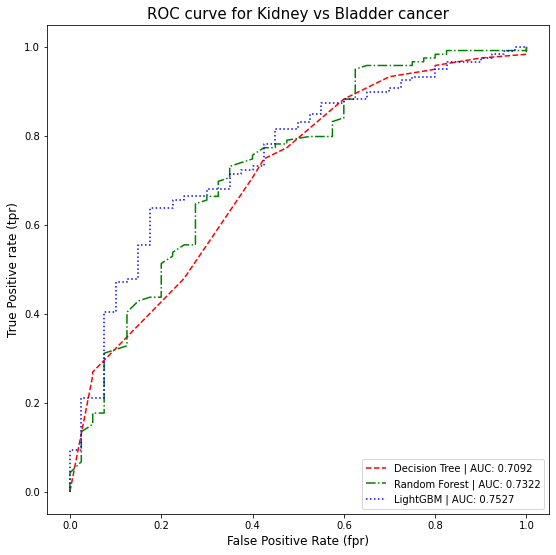

In [84]:
roc_auc(Y_test, positive_probs_dt, positive_probs_rf, positive_probs_lgbtm)

## **`Pearson correlation`**

In [85]:
def pearson_correlation(X, threshold):
  import seaborn as sns
  col_corr = set()
  corr_matrix = X.corr()
  # plt.figure(figsize=(50,30))
  # sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Accent_r)
  # plt.show()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (abs(corr_matrix.iloc[i,j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

## **`Threshold value for correlation`**

In [86]:

Threshold = 0.3 #@param{type:"slider", min:0.1, max:1.0, step:0.1}  



Correlated columns: {'Estimated GFR', 'Creatinine', 'Drinking', 'Total Bilirubin', 'Diabe1es', 'Urine Protein', 'Total Protein', 'Albumin', 'Urine epithelium count'}


Remaining columns: Index(['A/G Ratio', 'Alk', 'ALT (GPT)', 'AST (GOT)', 'BUN', 'Calcium',
       'Chloride', 'Direct Bilirubin', 'Glucose AC', 'Nitrite',
       'Urine occult Blood', 'pH', 'Potassium', 'Sodium', 'Specific Gravity',
       'Strip WBC', 'Total Cholesterol', 'Triglyceride',
       'Urine epitheilum (UL)', 'Uric acid', 'Urine Bilirubin',
       'Urine Glucose', 'Urine Ketone', 'Urobilinogen', 'age', 'gender',
       'Hyper1en1ion', 'Smoking', 'Bee1leNu1', 'FamilyHis1ory'],
      dtype='object')

Dropped columns: 9

Selected columns: 30

Decision tree's accuracy: 78.60000000000001%


Decision tree's classification report: 
                precision    recall  f1-score   support

        Kidney       0.71      0.25      0.37        40
UrinaryBladder       0.79      0.97      0.87       119

      accuracy    

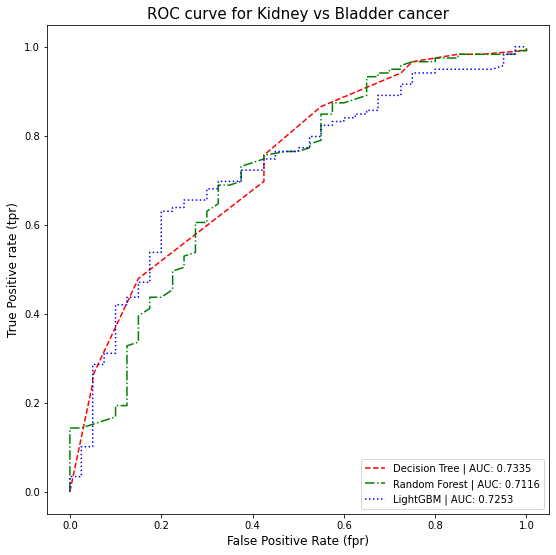

In [87]:
correlated_features = pearson_correlation(X, Threshold)
print(f"\nCorrelated columns: {correlated_features}")
print("\n")
X_pear = X.drop(correlated_features, axis=1)
print(f"Remaining columns: {X_pear.columns}\n")

print(f"Dropped columns: {len(correlated_features)}\n")
print(f"Selected columns: {len(X_pear.columns)}\n")

X_train, X_test, Y_train, Y_test = splitting(X_pear, Y)

# Ideal threshold value = 0.3 
_, _, Y_pred_proba_dt, _ = Decision_tree(X_train, Y_train, Y_test, classes)
positive_probs_dt = Y_pred_proba_dt[:,1]

# Ideal threshold value = 0.3
_, _, Y_pred_proba_dt, _ = Random_forest(X_train, Y_train, Y_test, classes)
positive_probs_rf = Y_pred_proba_dt[:,1]

# Ideal threshold value = 0.4
_, _, Y_pred_proba_dt, _ = Lgbtm(X_train, Y_train, Y_test, classes)
positive_probs_lgbtm = Y_pred_proba_dt[:,1]

roc_auc(Y_test, positive_probs_dt, positive_probs_rf, positive_probs_lgbtm)


## **`Principal Component Analysis (PCA)`** 

In [88]:
def pca(X, components):
  from sklearn import decomposition
  pcs = decomposition.PCA(n_components = components)
  pcs.fit(X)
  X_pca = pcs.transform(X)  
  return X_pca

In [89]:
dt_val = []
rf_val= []
lgbtm_val = []
for i in range(2, len(X.columns)):
  print(f"For {i} features: ")
  X_pca = pca(X, i)
  X_train, X_test, Y_train, Y_test = splitting(X_pca, Y)
  _, _, _, dt = Decision_tree(X_train, Y_train, Y_test, classes)
  _, _, _, r__f = Random_forest(X_train, Y_train, Y_test, classes)
  _, _, _, lgb__tm = Lgbtm(X_train, Y_train, Y_test, classes)
  dt_val.append(dt)
  rf_val.append(r__f)
  lgbtm_val.append(lgb__tm)

For 2 features: 
Decision tree's accuracy: 73.0%


Decision tree's classification report: 
                precision    recall  f1-score   support

        Kidney       0.20      0.03      0.04        40
UrinaryBladder       0.75      0.97      0.84       119

      accuracy                           0.73       159
     macro avg       0.47      0.50      0.44       159
  weighted avg       0.61      0.73      0.64       159



Decision tree's accuracy: 73.0%
Random Forest's accuracy: 66.7%


Random Forest's classification report: 
                precision    recall  f1-score   support

        Kidney       0.19      0.10      0.13        40
UrinaryBladder       0.74      0.86      0.79       119

      accuracy                           0.67       159
     macro avg       0.46      0.48      0.46       159
  weighted avg       0.60      0.67      0.63       159



Random Forest's accuracy: 66.7%
LightGBM's accuracy: 73.6%


LightGBM's classification report: 
                precision

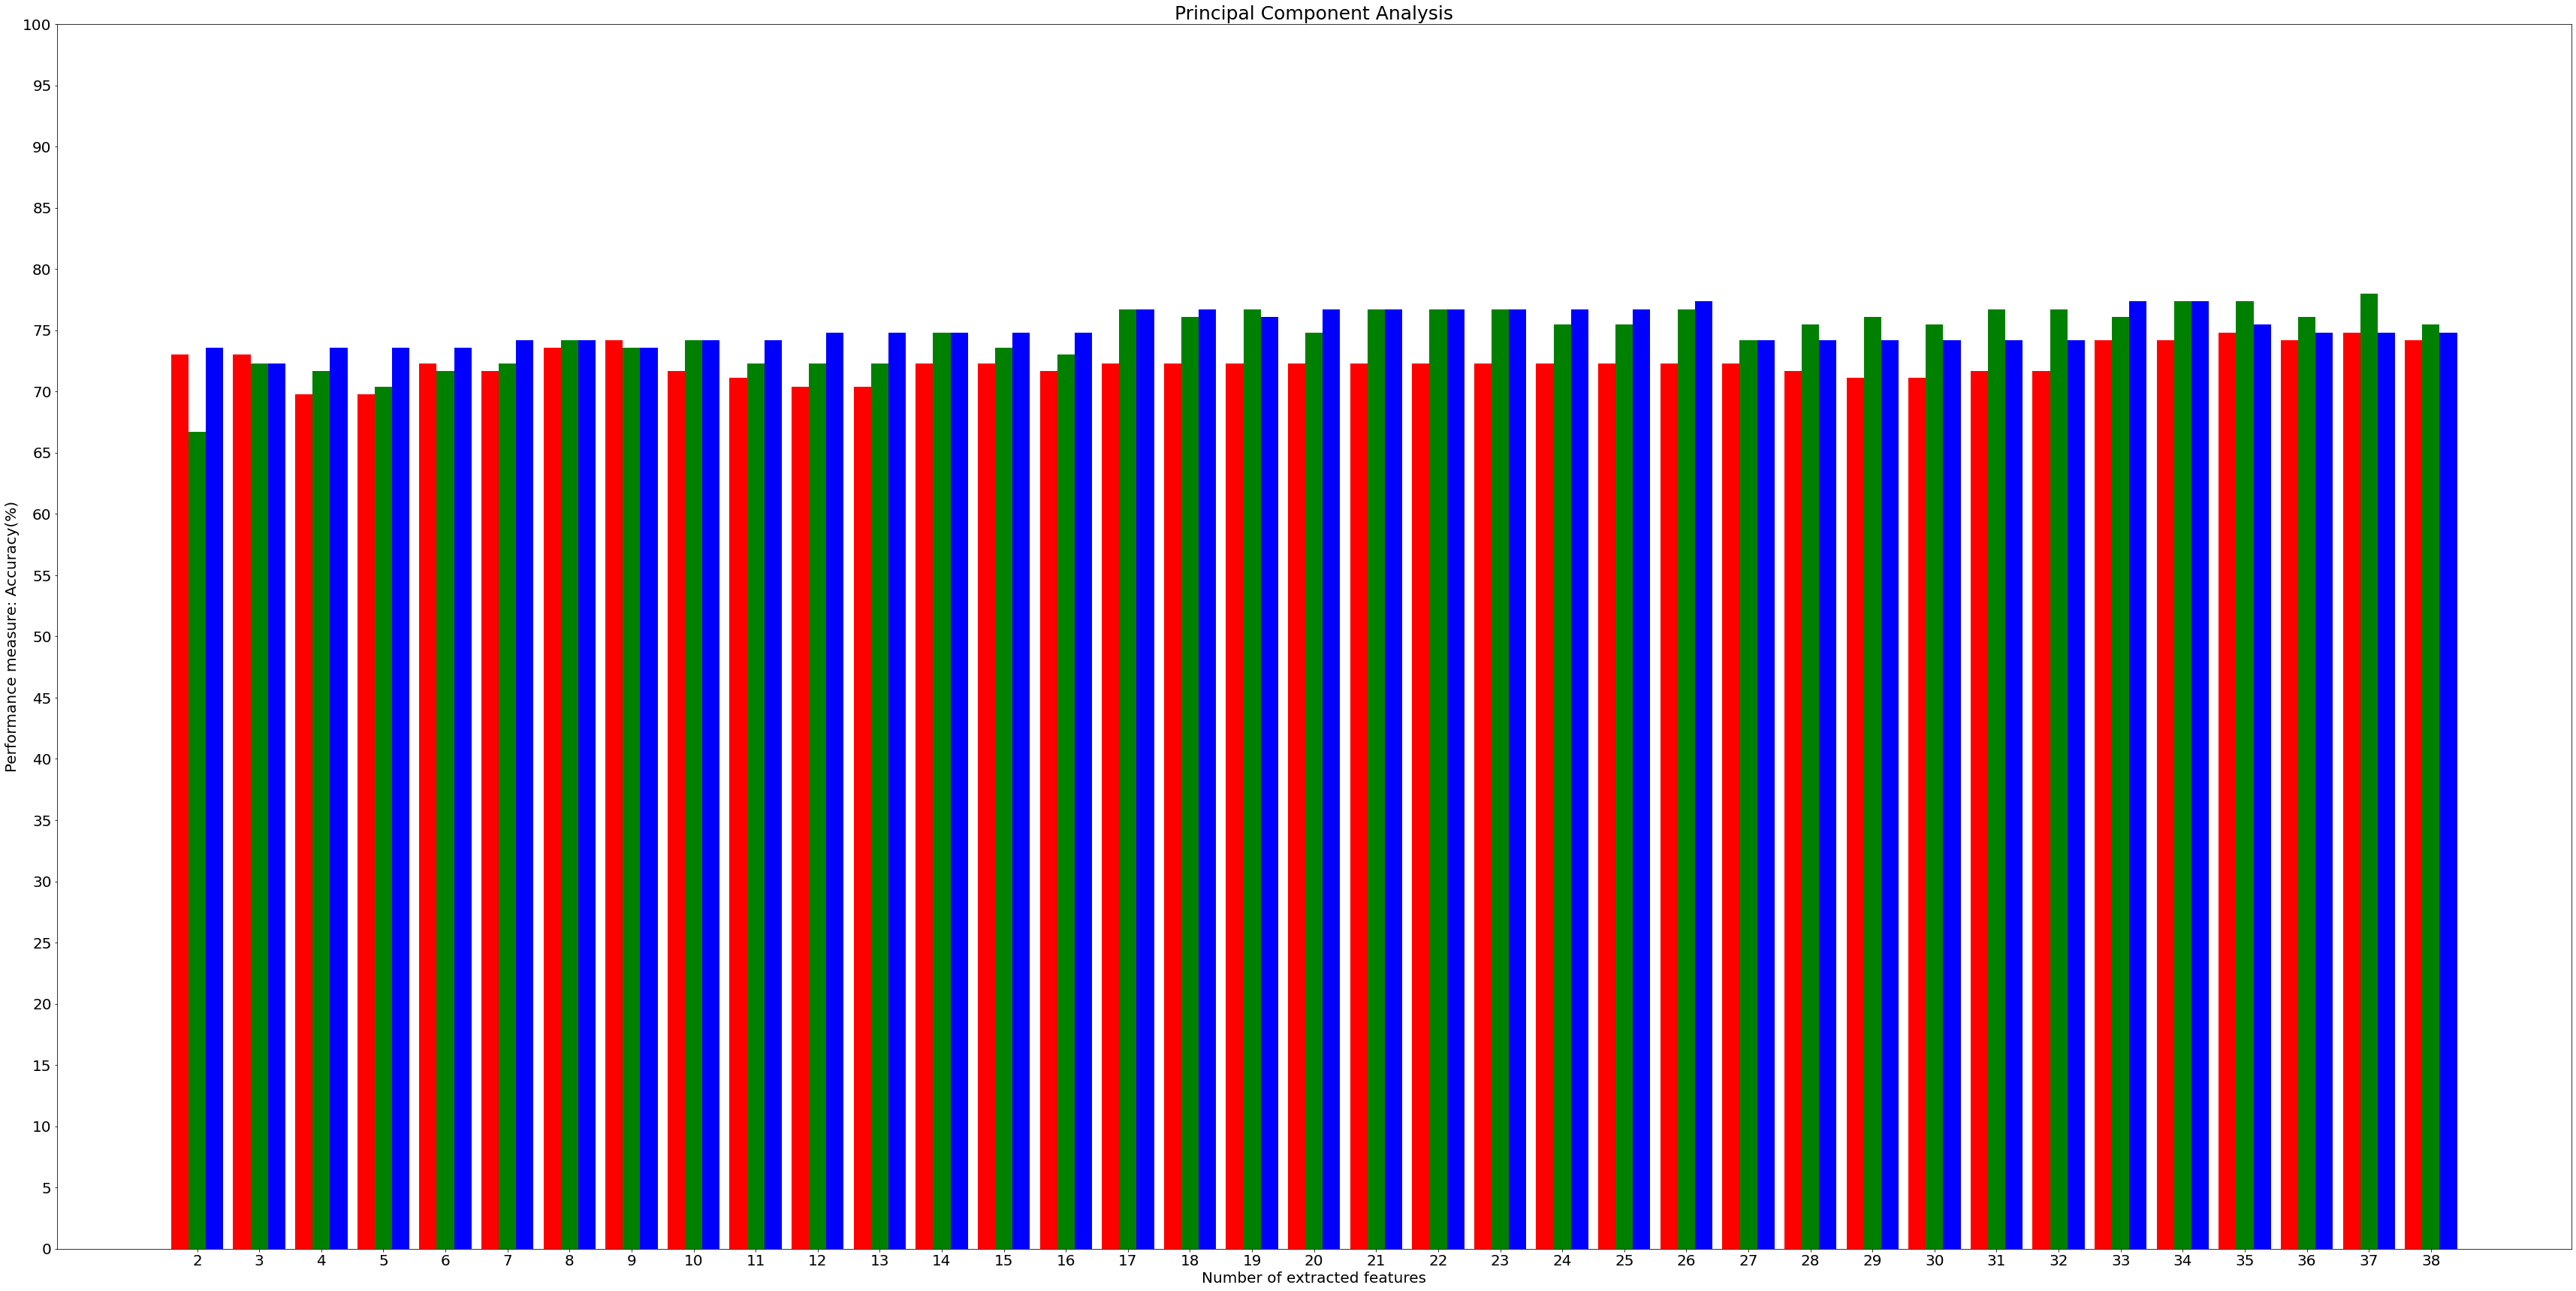

In [90]:
X_values = [i for i in range(2, len(X.columns))]

N = len(X_values)
ind = np.arange(N)
width = 0.28

plt.figure(figsize=(60, 30))

bar1 = plt.bar(ind, dt_val, width, color='r')
bar2 = plt.bar(ind+width, rf_val, width, color='g')
bar3 = plt.bar(ind+width*2, lgbtm_val, width, color='b')

plt.title("Principal Component Analysis", fontsize=25)
plt.xticks(ind+width, X_values, fontsize=20)
plt.yticks(np.arange(0, 105, 5), fontsize=20)
plt.xlabel("Number of extracted features", fontsize=20)
plt.ylabel("Performance measure: Accuracy(%)", fontsize=20)

plt.show()

In [91]:
X_pca = pca(X, 37)
X_train, X_test, Y_train, Y_test = splitting(X_pca, Y)

_, _, Y_pred_proba_dt, _ = Decision_tree(X_train, Y_train, Y_test, classes)
positive_probs_dt = Y_pred_proba_dt[:,1]

Decision tree's accuracy: 74.8%


Decision tree's classification report: 
                precision    recall  f1-score   support

        Kidney       0.50      0.45      0.47        40
UrinaryBladder       0.82      0.85      0.83       119

      accuracy                           0.75       159
     macro avg       0.66      0.65      0.65       159
  weighted avg       0.74      0.75      0.74       159



Decision tree's accuracy: 74.8%


In [92]:
X_pca = pca(X, 37)
X_train, X_test, Y_train, Y_test = splitting(X_pca, Y)

_, _, Y_pred_proba_rf, _ = Random_forest(X_train, Y_train, Y_test, classes)
positive_probs_rf = Y_pred_proba_rf[:,1]

Random Forest's accuracy: 78.0%


Random Forest's classification report: 
                precision    recall  f1-score   support

        Kidney       0.86      0.15      0.26        40
UrinaryBladder       0.78      0.99      0.87       119

      accuracy                           0.78       159
     macro avg       0.82      0.57      0.56       159
  weighted avg       0.80      0.78      0.72       159



Random Forest's accuracy: 78.0%


In [93]:
X_pca = pca(X, 26)
X_train, X_test, Y_train, Y_test = splitting(X_pca, Y)

_, _, Y_pred_proba_lgbtm, _ = Lgbtm(X_train, Y_train, Y_test, classes)
positive_probs_lgbtm = Y_pred_proba_lgbtm[:,1]

LightGBM's accuracy: 77.4%


LightGBM's classification report: 
                precision    recall  f1-score   support

        Kidney       0.83      0.12      0.22        40
UrinaryBladder       0.77      0.99      0.87       119

      accuracy                           0.77       159
     macro avg       0.80      0.56      0.54       159
  weighted avg       0.79      0.77      0.70       159



LightGBM's accuracy: 77.4%


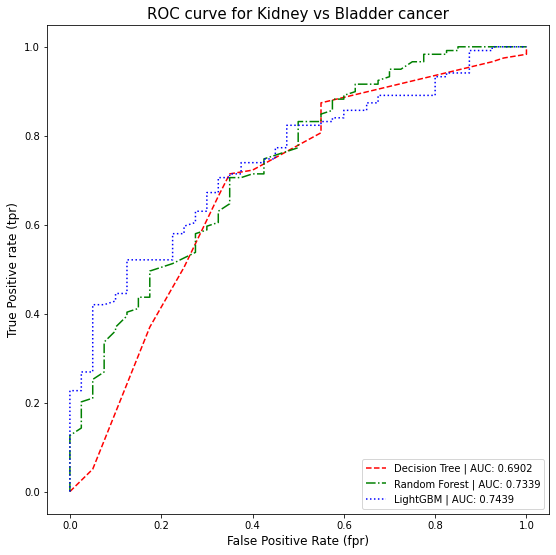

In [94]:
roc_auc(Y_test, positive_probs_dt, positive_probs_rf, positive_probs_lgbtm)

## **`Linear Discriminant Analysis (LDA)`**

In [95]:
def lda(X, Y):
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  lds = LDA() 
  lds.fit(X, Y)
  X_lda = lds.transform(X)  
  return X_lda

In [96]:
X_lda = lda(X, Y)
X_train, X_test, Y_train, Y_test = splitting(X_lda, Y)

In [97]:
_, Y_pred_dt, Y_pred_proba_dt, _ = Decision_tree(X_train, Y_train, Y_test, classes)
positive_probs_dt = Y_pred_proba_dt[:,1]

Decision tree's accuracy: 80.5%


Decision tree's classification report: 
                precision    recall  f1-score   support

        Kidney       0.63      0.55      0.59        40
UrinaryBladder       0.85      0.89      0.87       119

      accuracy                           0.81       159
     macro avg       0.74      0.72      0.73       159
  weighted avg       0.80      0.81      0.80       159



Decision tree's accuracy: 80.5%


In [98]:
_, Y_pred_dt, Y_pred_proba_dt, _ = Random_forest(X_train, Y_train, Y_test, classes)
positive_probs_rf = Y_pred_proba_dt[:,1]

Random Forest's accuracy: 70.39999999999999%


Random Forest's classification report: 
                precision    recall  f1-score   support

        Kidney       0.41      0.40      0.41        40
UrinaryBladder       0.80      0.81      0.80       119

      accuracy                           0.70       159
     macro avg       0.61      0.60      0.60       159
  weighted avg       0.70      0.70      0.70       159



Random Forest's accuracy: 70.39999999999999%


In [99]:
_, Y_pred_dt, Y_pred_proba_dt, _ = Lgbtm(X_train, Y_train, Y_test, classes)
positive_probs_rf = Y_pred_proba_dt[:,1]

LightGBM's accuracy: 79.9%


LightGBM's classification report: 
                precision    recall  f1-score   support

        Kidney       0.62      0.53      0.57        40
UrinaryBladder       0.85      0.89      0.87       119

      accuracy                           0.80       159
     macro avg       0.73      0.71      0.72       159
  weighted avg       0.79      0.80      0.79       159



LightGBM's accuracy: 79.9%


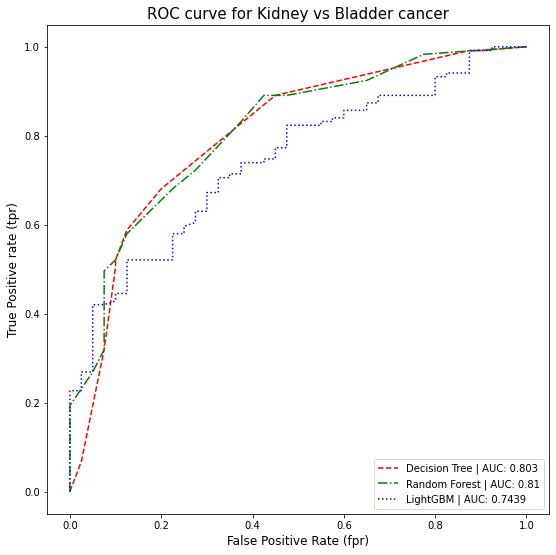

In [100]:
roc_auc(Y_test, positive_probs_dt, positive_probs_rf, positive_probs_lgbtm)